In [34]:
from utils import import_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
dataset_path = "data"
dataset_version = "fake-v1.0"

fake_dataset = import_data(dataset_path, dataset_version).T
fake_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_media_count          1194 non-null   float64
 1   user_follower_count       1194 non-null   float64
 2   user_following_count      1194 non-null   float64
 3   user_has_profil_pic       1194 non-null   float64
 4   user_is_private           1194 non-null   float64
 5   follower_following_ratio  1194 non-null   float64
 6   user_biography_length     1194 non-null   float64
 7   username_length           1194 non-null   float64
 8   username_digit_count      1194 non-null   float64
 9   is_fake                   1194 non-null   float64
dtypes: float64(10)
memory usage: 93.4 KB


In [36]:
X = fake_dataset.drop('is_fake', axis=1)
y = fake_dataset.is_fake

Text(0.5, 1.0, 'Correlation Matrix')

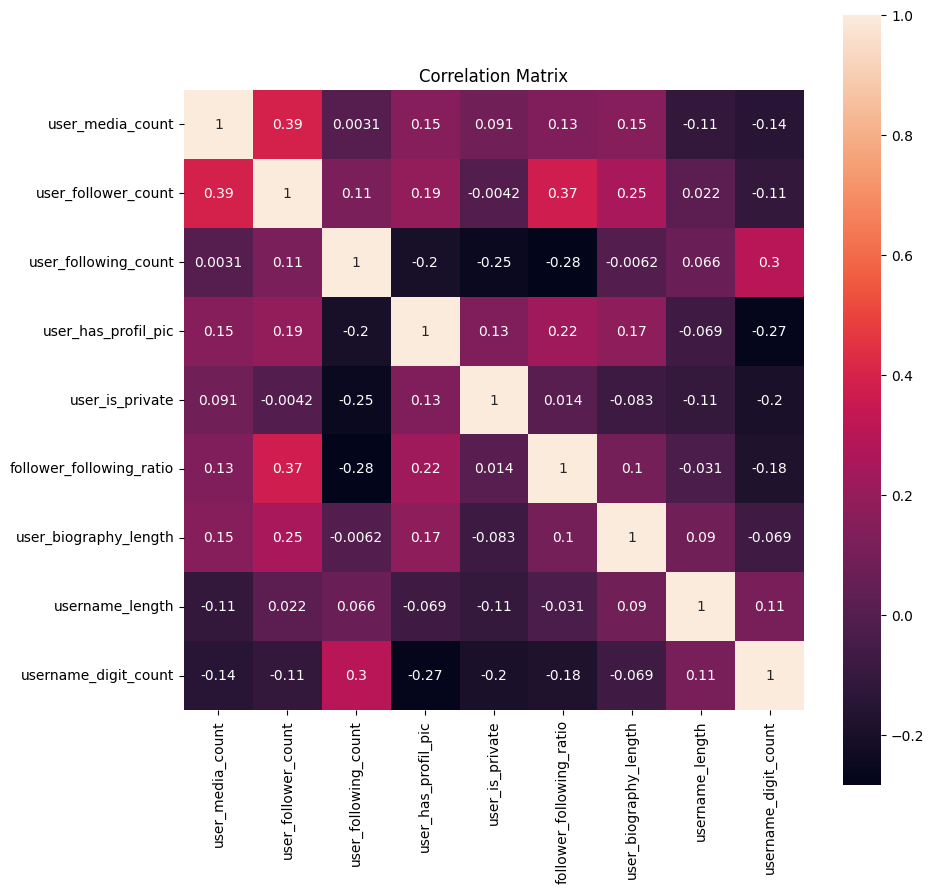

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), vmax=1, square=True,annot=True)
plt.title('Correlation Matrix')

In [38]:

def train_test_split(X, y, test_size=0.2):
    i = int((1 - test_size) * X.shape[0]) 
    o = np.random.permutation(X.shape[0])
    
    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

d:\Games\Miniconda\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


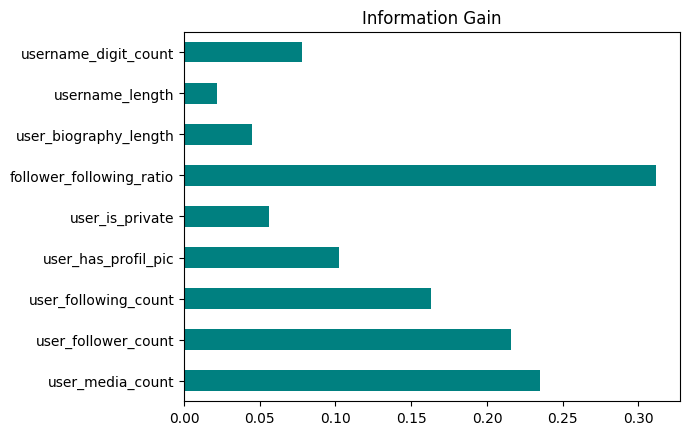

In [41]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(X_train,y_train)
feat_importances = pd.Series(importances, fake_dataset.columns[0:len(fake_dataset.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.title('Information Gain')
plt.show()

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert to categorical data by converting data to integers
X_cat = X_train.astype(int)

# three featueres with highest chi-squared statistic are selected
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X_cat, y_train)

print('Original feature number: ', X_cat.shape[1])
print('Reduced feature number: ', X_kbest_features.shape[1])

Original feature number:  9
Reduced feature number:  3


Text(0.5, 1.0, 'Fisher’s Score')

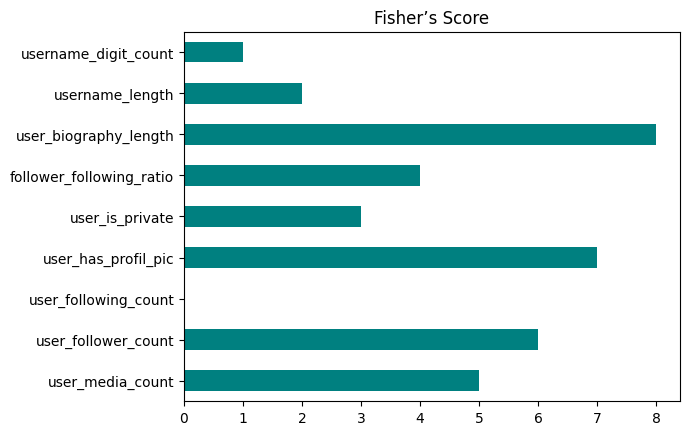

In [44]:
from skfeature.function.similarity_based import fisher_score

score = fisher_score.fisher_score(X_train.to_numpy(), y_train.to_numpy())
feat_importances = pd.Series(score, fake_dataset.columns[0:len(fake_dataset.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.title('Fisher’s Score')

In [46]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

# X_arr = array[:,0:8]
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X_train)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

ConversionError: Failed to convert value(s) to axis units: ['user_media_count', 'user_follower_count', 'user_following_count', 'user_has_profil_pic', 'user_is_private', 'follower_following_ratio', 'user_biography_length', 'username_length', 'username_digit_count']

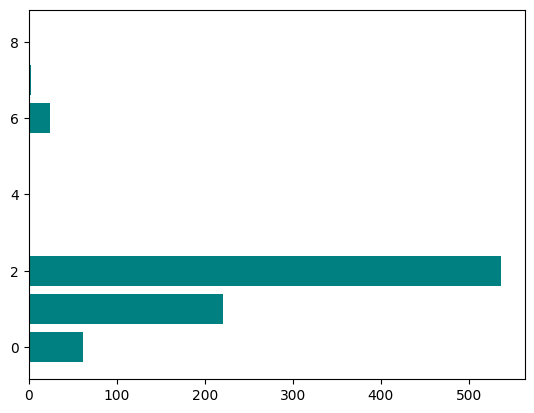

In [53]:
mean_abs_diff = np.sum(np.abs(X_train - np.mean(X_train, axis = 0)), axis = 0) / X_train.shape[0]

plt.barh(np.arange(X_train.shape[1]), mean_abs_diff, color = 'teal')
bars = ('user_media_count', 'user_follower_count', 'user_following_count',
       'user_has_profil_pic', 'user_is_private', 'follower_following_ratio',
       'user_biography_length', 'username_length', 'username_digit_count')
plt.xticks(bars, color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.title('Mean Absolute Difference (MAD)')
